# For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import itertools
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns

# 1 Read the data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')

In [4]:
df

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


As we can see the Sparkling wine sales data is from the year 1980 to 1995

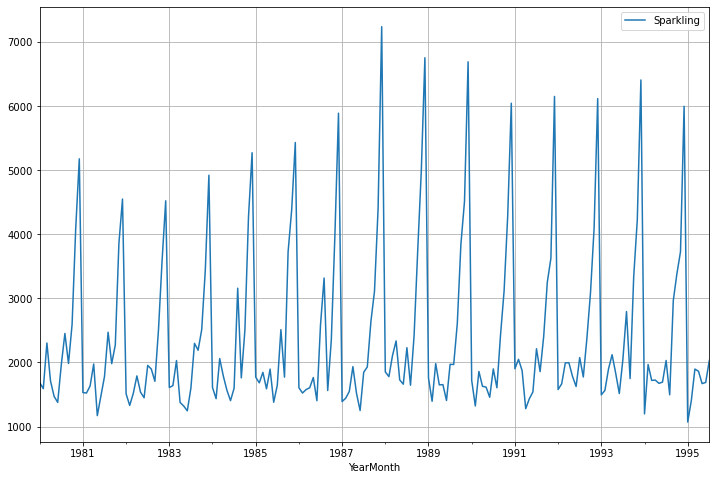

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.grid()

From the above figure we can state:
1. There is a some trend in the data.
2. There seems to be seasonality.

# 2) Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [6]:
df.shape

(187, 1)

There are 187 rows

In [7]:
df.isnull().sum()

Sparkling    0
dtype: int64

There are no missing values in this dataset.

In [8]:
df.mean()

Sparkling    2402.417112
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [10]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [ ]:
# 1 The max number of sales in Rose is 7242.
# 2 The average sales here for rose is 2402.

# Plotting a year on year boxplot for the Rose wine production.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

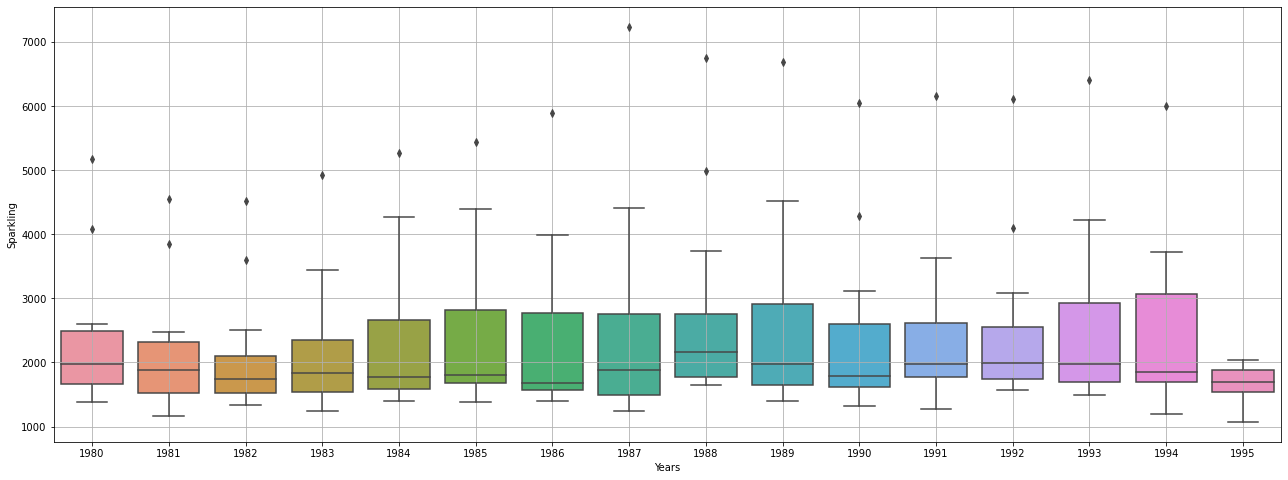

In [11]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df.index.year, df['Sparkling'], ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Sparkling');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the sales of wine has some outliers for certain years.

# Plot a monthly boxplot for the sales taking all the years into account.

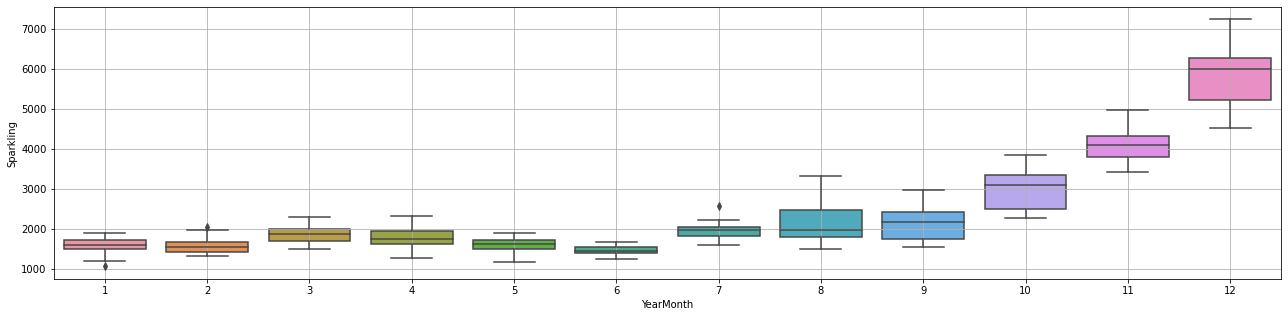

In [12]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df.index.month, df['Sparkling'] , ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years show very few outliers.

# Plotting a monthplot of the give Time Series.

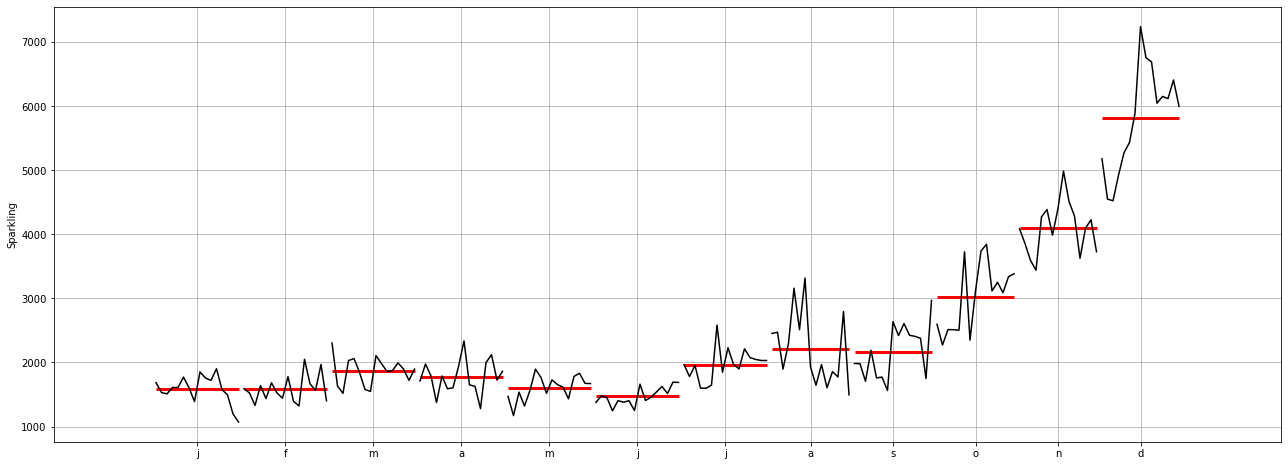

In [13]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Sparkling',ax=ax)
plt.grid();

# Decompose the time series

### Additive Model

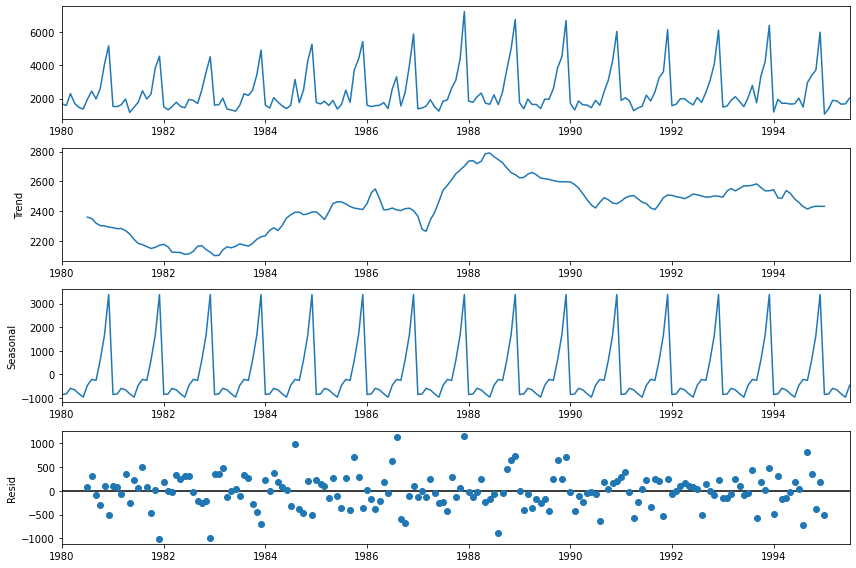

In [14]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

### Multipicative Model

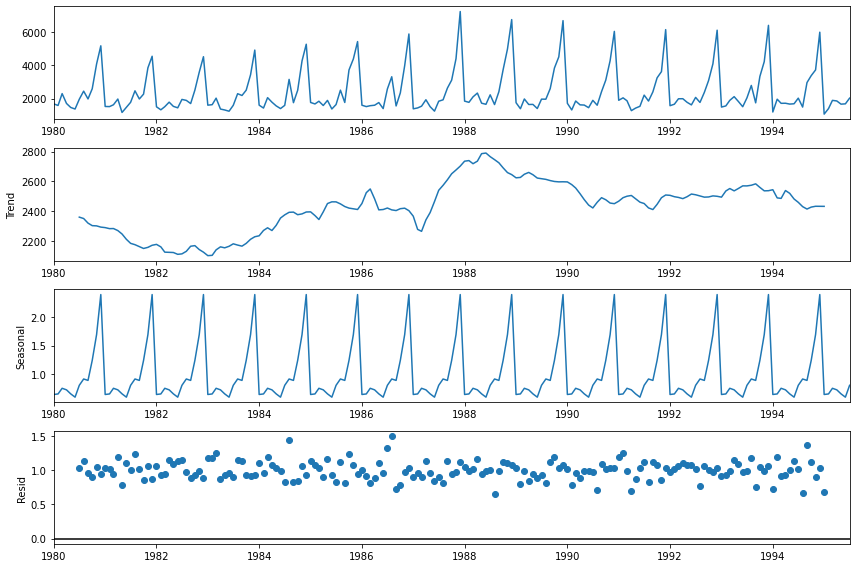

In [15]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

As per the decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

# 3) Split the data into training and test. The test data should start in 1991.

In [16]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [17]:
train = df[df.index.year < 1991]

In [18]:
train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [19]:
train.shape

(132, 1)

In [20]:
test = df[df.index.year >= 1991]

In [21]:
test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [22]:
test.shape

(55, 1)

In [23]:
(test.shape[0]/len(df))*100

29.411764705882355

# 4) Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
Please do try to build as many models as possible and as many iterations of models as possible with different parameters.

In [24]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display

# Simple Exponential Smoothing

In [25]:
model_SES = SimpleExpSmoothing(train)

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [26]:
model_SES_autofit = model_SES.fit(optimized=True)

In [27]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7785129693348,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [28]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2403.778513
1991-02-01    2403.778513
1991-03-01    2403.778513
1991-04-01    2403.778513
1991-05-01    2403.778513
1991-06-01    2403.778513
1991-07-01    2403.778513
1991-08-01    2403.778513
1991-09-01    2403.778513
1991-10-01    2403.778513
1991-11-01    2403.778513
1991-12-01    2403.778513
1992-01-01    2403.778513
1992-02-01    2403.778513
1992-03-01    2403.778513
1992-04-01    2403.778513
1992-05-01    2403.778513
1992-06-01    2403.778513
1992-07-01    2403.778513
1992-08-01    2403.778513
1992-09-01    2403.778513
1992-10-01    2403.778513
1992-11-01    2403.778513
1992-12-01    2403.778513
1993-01-01    2403.778513
1993-02-01    2403.778513
1993-03-01    2403.778513
1993-04-01    2403.778513
1993-05-01    2403.778513
1993-06-01    2403.778513
1993-07-01    2403.778513
1993-08-01    2403.778513
1993-09-01    2403.778513
1993-10-01    2403.778513
1993-11-01    2403.778513
1993-12-01    2403.778513
1994-01-01    2403.778513
1994-02-01    2403.778513
1994-03-01  

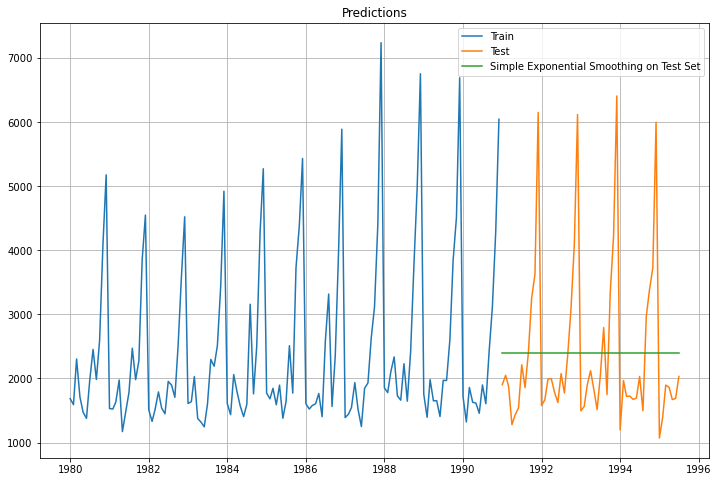

In [29]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions');

In [30]:
# RMSE score
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['SES'])
resultsDf

,Test RMSE
SES,1275.081797


# Double Exponential Smoothing

In [31]:
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

print(model_DES.params)

{'smoothing_level': 0.647813694640395, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 1686.0831159246613, 'initial_slope': 27.061112019170352, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [32]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5281.503812
1991-02-01    5308.564924
1991-03-01    5335.626036
1991-04-01    5362.687148
1991-05-01    5389.748260
1991-06-01    5416.809372
1991-07-01    5443.870484
1991-08-01    5470.931596
1991-09-01    5497.992708
1991-10-01    5525.053820
1991-11-01    5552.114932
1991-12-01    5579.176044
1992-01-01    5606.237156
1992-02-01    5633.298268
1992-03-01    5660.359380
1992-04-01    5687.420492
1992-05-01    5714.481604
1992-06-01    5741.542716
1992-07-01    5768.603828
1992-08-01    5795.664940
1992-09-01    5822.726052
1992-10-01    5849.787164
1992-11-01    5876.848276
1992-12-01    5903.909388
1993-01-01    5930.970500
1993-02-01    5958.031612
1993-03-01    5985.092724
1993-04-01    6012.153836
1993-05-01    6039.214948
1993-06-01    6066.276060
1993-07-01    6093.337172
1993-08-01    6120.398284
1993-09-01    6147.459396
1993-10-01    6174.520509
1993-11-01    6201.581621
1993-12-01    6228.642733
1994-01-01    6255.703845
1994-02-01    6282.764957
1994-03-01  

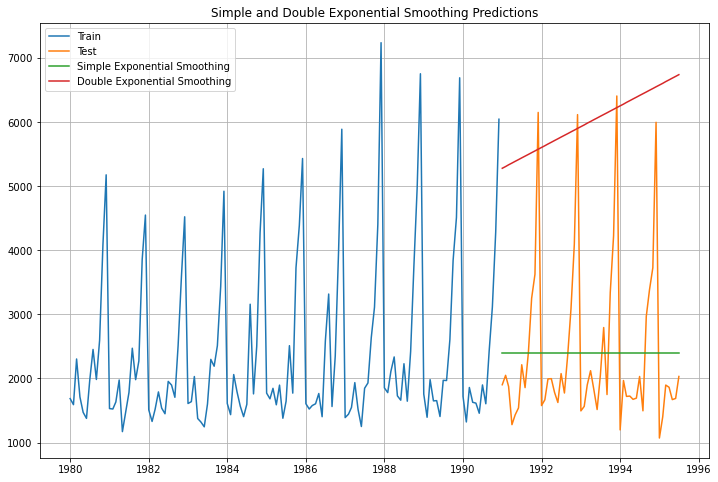

In [33]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing')
plt.plot(DES_predict, label='Double Exponential Smoothing')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [34]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353


# Triple Exponential Smoothing

In [35]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()
print(model_TES.params)

{'smoothing_level': 0.08268990292653239, 'smoothing_slope': 2.051744153305793e-21, 'smoothing_seasonal': 0.4745746750433869, 'damping_slope': nan, 'initial_level': 1627.2421641044662, 'initial_slope': 0.02355149612323112, 'initial_seasons': array([  33.98708847,  -41.29833497,  437.08045428,  214.28665046,
       -144.3500382 , -151.68763262,  333.48794046,  856.04391972,
        405.06112382,  968.81967349, 2392.81136034, 3410.63921181]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [36]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1539.837031
1991-02-01    1249.397229
1991-03-01    1733.492420
1991-04-01    1591.489504
1991-05-01    1500.107435
1991-06-01    1317.238310
1991-07-01    1840.821499
1991-08-01    1702.887969
1991-09-01    2342.292584
1991-10-01    3253.431313
1991-11-01    4328.731241
1991-12-01    6466.470708
1992-01-01    1540.119649
1992-02-01    1249.679847
1992-03-01    1733.775038
1992-04-01    1591.772122
1992-05-01    1500.390053
1992-06-01    1317.520928
1992-07-01    1841.104117
1992-08-01    1703.170587
1992-09-01    2342.575202
1992-10-01    3253.713930
1992-11-01    4329.013859
1992-12-01    6466.753326
1993-01-01    1540.402267
1993-02-01    1249.962465
1993-03-01    1734.057656
1993-04-01    1592.054740
1993-05-01    1500.672671
1993-06-01    1317.803546
1993-07-01    1841.386735
1993-08-01    1703.453205
1993-09-01    2342.857820
1993-10-01    3253.996548
1993-11-01    4329.296477
1993-12-01    6467.035944
1994-01-01    1540.684885
1994-02-01    1250.245083
1994-03-01  

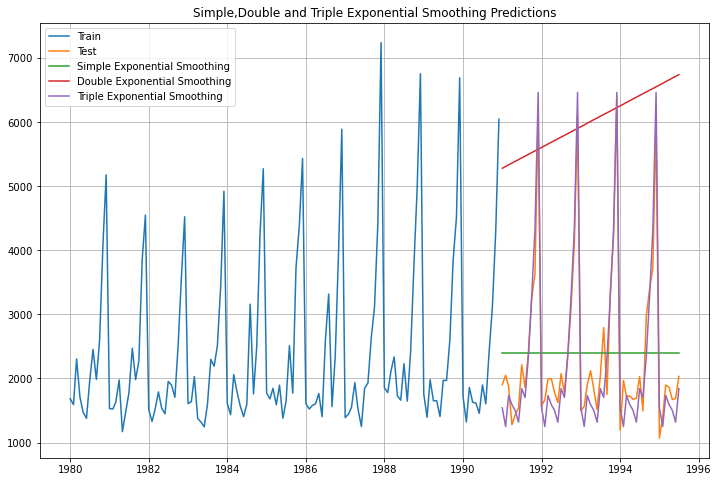

In [37]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing')
plt.plot(DES_predict, label='Double Exponential Smoothing')
plt.plot(TES_predict, label='Triple Exponential Smoothing')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [38]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809


In [39]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()
print(model_TES_am.params)

{'smoothing_level': 0.15422296121359397, 'smoothing_slope': 1.301480782470938e-21, 'smoothing_seasonal': 0.3713286211933088, 'damping_slope': nan, 'initial_level': 1639.999323231411, 'initial_slope': 4.848200825810074, 'initial_seasons': array([1.00842104, 0.96898294, 1.2417913 , 1.13205891, 0.93982498,
       0.93811274, 1.22459072, 1.54430896, 1.27336931, 1.63198855,
       2.48296582, 3.1186532 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [40]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1602.185727
1991-02-01    1373.879845
1991-03-01    1807.433549
1991-04-01    1704.567367
1991-05-01    1602.372641
1991-06-01    1415.478327
1991-07-01    1944.850620
1991-08-01    1910.053047
1991-09-01    2435.202599
1991-10-01    3333.458551
1991-11-01    4407.781796
1991-12-01    6328.533064
1992-01-01    1656.055043
1992-02-01    1419.943906
1992-03-01    1867.865145
1992-04-01    1761.401275
1992-05-01    1655.651124
1992-06-01    1462.412576
1992-07-01    2009.160030
1992-08-01    1973.038265
1992-09-01    2515.284895
1992-10-01    3442.780646
1992-11-01    4551.942764
1992-12-01    6534.951553
1993-01-01    1709.924358
1993-02-01    1466.007966
1993-03-01    1928.296740
1993-04-01    1818.235184
1993-05-01    1708.929607
1993-06-01    1509.346825
1993-07-01    2073.469441
1993-08-01    2036.023483
1993-09-01    2595.367191
1993-10-01    3552.102741
1993-11-01    4696.103731
1993-12-01    6741.370042
1994-01-01    1763.793674
1994-02-01    1512.072027
1994-03-01  

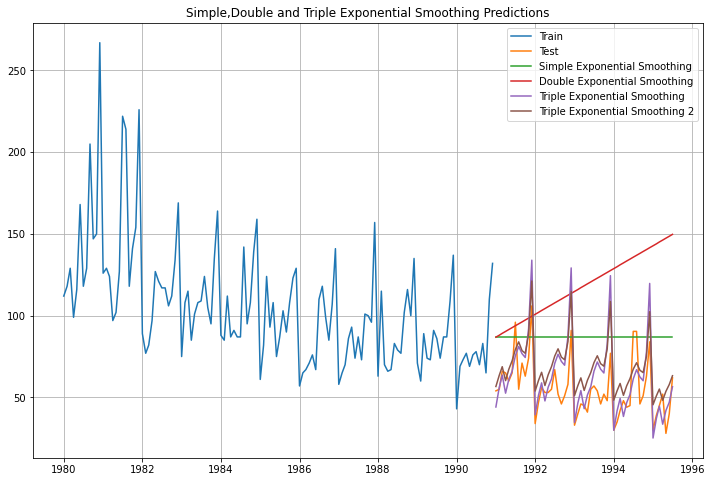

In [44]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing')
plt.plot(DES_predict, label='Double Exponential Smoothing')
plt.plot(TES_predict, label='Triple Exponential Smoothing')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing 2')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [41]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['TES2'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844


# Linear Regression Model

In [42]:
len(train)

132

In [43]:
len(test)

55

In [44]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [45]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [46]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-08-01,1605,128
1990-09-01,2424,129
1990-10-01,3116,130
1990-11-01,4286,131
1990-12-01,6047,132


First few rows of Test Data


,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-01,1897,183
1995-04-01,1862,184
1995-05-01,1670,185
1995-06-01,1688,186
1995-07-01,2031,187


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [51]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

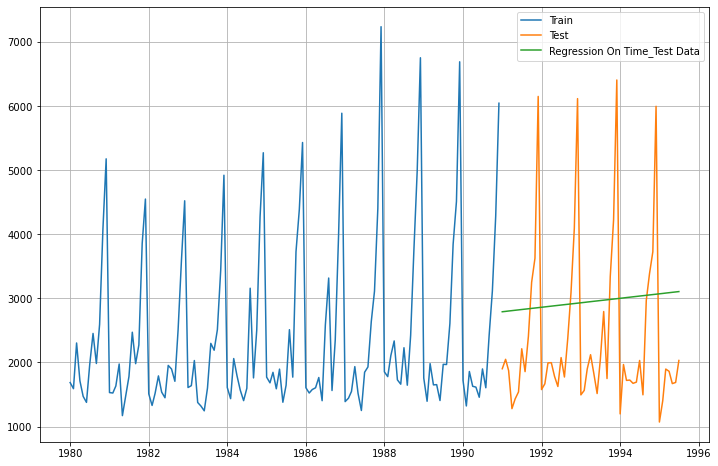

In [53]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [54]:
from sklearn import metrics

In [55]:
rmse_lr_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)

In [56]:
rmse_lr_test

1389.135174897992

In [57]:
resultsDf.loc['LR'] = rmse_lr_test

In [58]:
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844
LR,1389.135175


# Naive Approach

In [59]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [60]:
NaiveModel_train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [61]:
NaiveModel_test.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [65]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

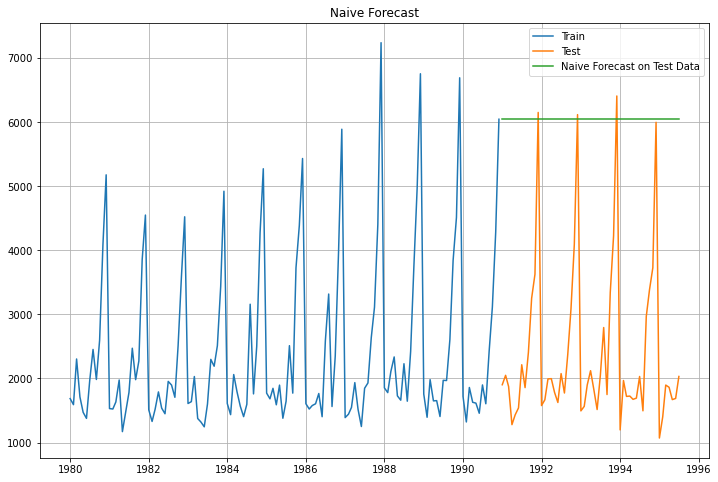

In [66]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [67]:
rmse_nb_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)

In [68]:
rmse_nb_test

3864.2793518443914

In [69]:
resultsDf.loc['NB'] = rmse_nb_test

In [70]:
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844
LR,1389.135175
NB,3864.279352


# Simple Average

In [71]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [72]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


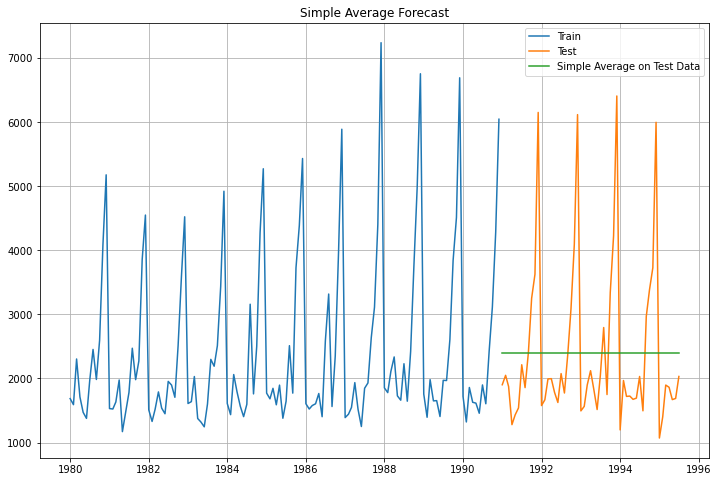

In [73]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [74]:
rmse_sm_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)

In [75]:
resultsDf.loc['Simple Average'] = rmse_sm_test

In [76]:
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844
LR,1389.135175
NB,3864.279352
Simple Average,1275.081804


# Moving Average

In [77]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [78]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


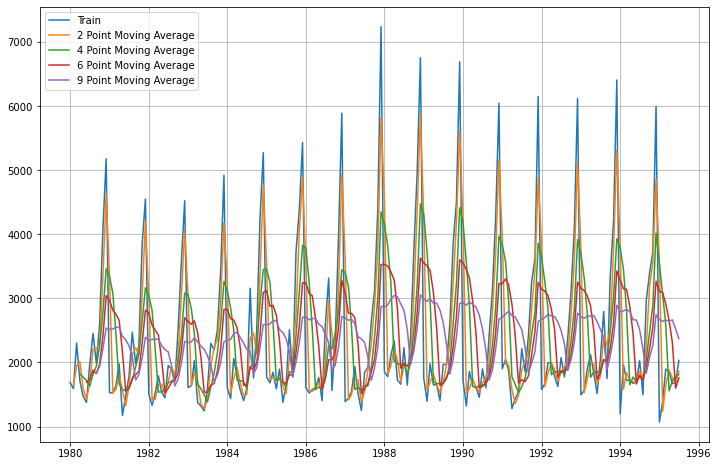

In [79]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [80]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

In [81]:
trailing_MovingAverage_train.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


In [82]:
trailing_MovingAverage_test.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-01,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-01,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-01,1874,1961.5,2968.00,3212.333333,2800.222222
1991-04-01,1279,1576.5,1776.00,2906.166667,2731.333333
1991-05-01,1432,1355.5,1658.50,2430.500000,2712.111111


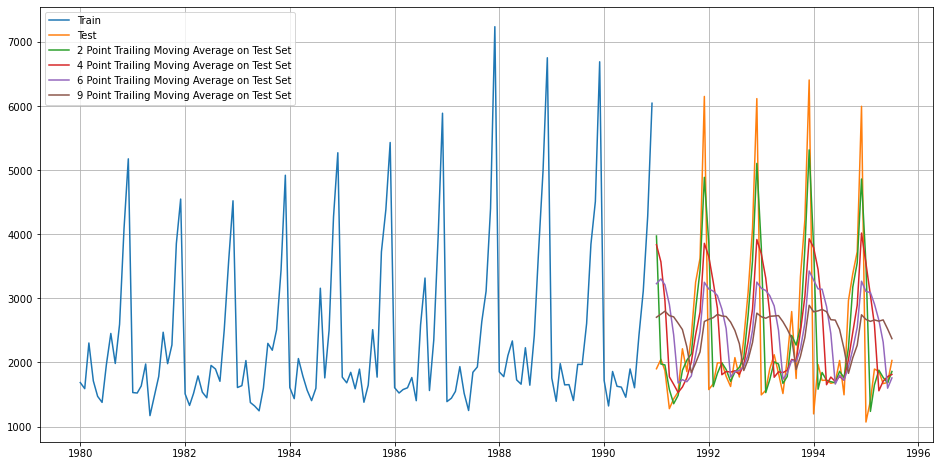

In [83]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [85]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [86]:
all_ma = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, all_ma])
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844
LR,1389.135175
NB,3864.279352
Simple Average,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


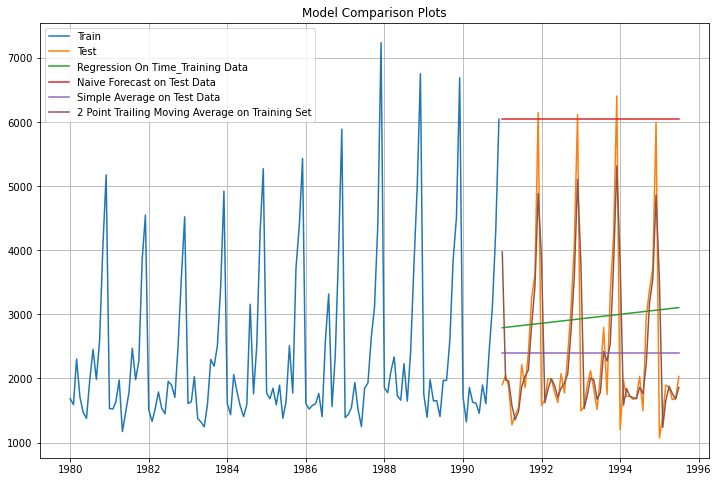

In [87]:
# Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# 5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [223]:
# H0: Null Hypothesis: The time series is not stationary
# Ha: Alternate Hypothesis: The time series is stationary

In [224]:
# Checking for Stationarity

In [88]:
from statsmodels.tsa.stattools import adfuller

In [89]:
dftest = adfuller(df)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


In [227]:
# As p-value is > 0.05 we fail to reject H0 and we can say that the time series is not stationary

In [91]:
data_diff = df.diff(periods=1)
data_diff.dropna(inplace=True)

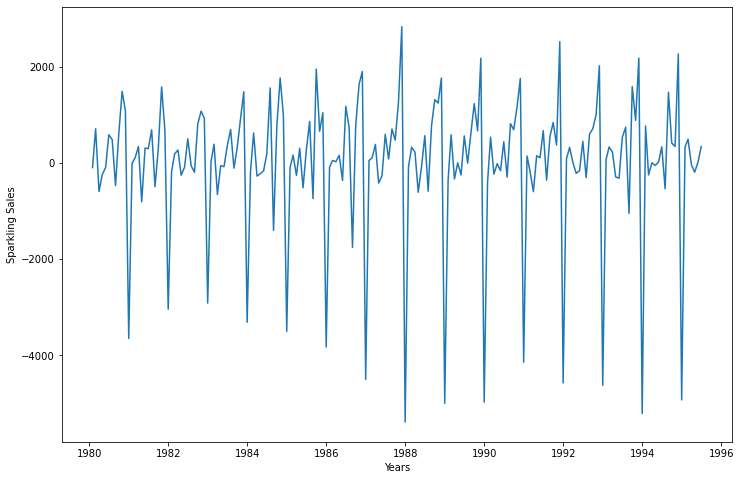

In [93]:
plt.plot(data_diff)
plt.xlabel('Years')
plt.ylabel('Sparkling Sales');

In [94]:
dftest_diff = adfuller(data_diff)
dftest_diff
print('DF test statistic is %3.3f' %dftest_diff[0])
print('DF test p-value is %1.4f' %dftest_diff[1])

DF test statistic is -45.050
DF test p-value is 0.0000


As we can see after taking difference p-value drops to 0 which is < 0.05 so we reject H0 and conclude that 
the time series is now stationary and we can proceed with our models

# 6) Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [95]:
train_diff = train.diff(periods=1)

In [96]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [97]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [98]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

# ARIMA Model

In [99]:
# best_arima_aic = np.inf
# best_arima_pdq = None

In [100]:
for param in pdq:#looping through the (p,d,q) values for ARIMA
    arima_model = ARIMA(train,order=param).fit()
    print('Parmas{} - AICs-{}'.format(param,arima_model.aic))     
            
#         try:
#             arima_model = ARIMA(train,order=param).fit()
            
#             print('all aic',arima_model.aic)
#             if arima_model.aic < best_arima_aic:#defining a conditional statement about whether the AIC of the model
#                 #just built is less than the best_aic
#                 best_arima_aic = arima_model.aic#defining the new value of AIC from the SARIMA model as the best_aic
#                 best_arima_pdq = param#storing the (p,d,q) values in the variable best_pdq
#         except:
#             #print("Unexpected error:", sys.exc_info()[0])
#             continue
# print("Best ARIMA{} - AIC:{}".format(best_pdq, best_aic))

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

Parmas(0, 0, 0) - AICs-2271.203212328525
Parmas(0, 0, 1) - AICs-2245.268852081529
Parmas(0, 1, 0) - AICs-2269.582796371201
Parmas(0, 1, 1) - AICs-2264.906439225404
Parmas(1, 0, 0) - AICs-2247.3482714177458
Parmas(1, 0, 1) - AICs-2245.9490900488477
Parmas(1, 1, 0) - AICs-2268.5280606863257
Parmas(1, 1, 1) - AICs-2235.013945350335


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [238]:
# So the best AIC is AIC:2235.775752684674 with p = 1, d = 1 and q = 1

In [147]:
arima_model = ARIMA(train,order=(1,1,1)).fit()

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [100]:
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.888
Method:                       css-mle   S.D. of innovations             30.279
Date:                Fri, 06 Nov 2020   AIC                           1277.776
Time:                        00:02:25   BIC                           1289.277
Sample:                    02-01-1980   HQIC                          1282.449
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4871      0.086     -5.656      0.000      -0.656      -0.318
ar.L1.D.Rose     0.2006      0.087      2.293      0.022       0.029       0.372
ma.L1.D.Rose    -0.9999      0.035    -28.64

In [148]:
test.shape

(55, 1)

In [149]:
pred_arima = arima_model.forecast(steps=55)

In [150]:
from sklearn.metrics import mean_squared_error
rmse_arima = np.sqrt(mean_squared_error(test,pred_arima[0]))
rmse_arima

1461.6676526007445

In [151]:
resultsDf.loc['ARIMA'] = rmse_arima

In [152]:
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844
LR,1389.135175
NB,3864.279352
Simple Average,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


# SARIMA Model

In [107]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [153]:
for param in pdq:#looping through the (p,d,q) values for ARIMA
    for param_seasonal in seasonal_pdq:#looping through the (P,D,Q,freq) values for SARIMA
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train,#defining the SARIMA model after taking
                                                   # the difference of the training data
                                             order = param,#setting the (p,d,q) values
                                             seasonal_order = param_seasonal,#setting the (P,D,Q,freq) values
                                             enforce_stationarity=True)
            results = temp_model.fit()#fitting the above built SARIMA model

            print('AICs',results.aic,param,param_seasonal)
            if results.aic < best_aic:#defining a conditional statement about whether the AIC of the model
                #just built is less than the best_aic
                best_aic = results.aic#defining the new value of AIC from the SARIMA model as the best_aic
                best_pdq = param#storing the (p,d,q) values in the variable best_pdq
                best_seasonal_pdq = param_seasonal#storing the (P,D,Q,freq) values in the variable 
                #best_seasonal_pdq
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 2465.5831209790667 (0, 0, 0) (0, 0, 0, 12)
AICs 2336.0736172365087 (0, 0, 0) (0, 0, 1, 12)
AICs 1800.605209089621 (0, 0, 0) (0, 1, 0, 12)
AICs 1781.4739548921407 (0, 0, 0) (0, 1, 1, 12)
AICs 2025.459339690266 (0, 0, 0) (1, 0, 0, 12)
AICs 2010.5722826744268 (0, 0, 0) (1, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1786.622560559047 (0, 0, 0) (1, 1, 0, 12)
AICs 1783.4420050136005 (0, 0, 0) (1, 1, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2372.4532492708477 (0, 0, 1) (0, 0, 0, 12)
AICs 2250.686154292587 (0, 0, 1) (0, 0, 1, 12)
AICs 1795.9583536204057 (0, 0, 1) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1778.457988521774 (0, 0, 1) (0, 1, 1, 12)
AICs 2014.5361051874834 (0, 0, 1) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2002.0683232941767 (0, 0, 1) (1, 0, 1, 12)
AICs 1783.5777819001144 (0, 0, 1) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1780.263720158094 (0, 0, 1) (1, 1, 1, 12)
AICs 2267.6630357855465 (0, 1, 0) (0, 0, 0, 12)
AICs 2179.939363178083 (0, 1, 0) (0, 0, 1, 12)
AICs 1837.436763242784 (0, 1, 0) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1820.8690065108165 (0, 1, 0) (0, 1, 1, 12)
AICs 2061.3806922605127 (0, 1, 0) (1, 0, 0, 12)
AICs 2049.8777358244074 (0, 1, 0) (1, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1826.0909414867165 (0, 1, 0) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1822.4059517568458 (0, 1, 0) (1, 1, 1, 12)
AICs 2263.0600155831944 (0, 1, 1) (0, 0, 0, 12)
AICs 2171.8628995286795 (0, 1, 1) (0, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1795.5874917947513 (0, 1, 1) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1773.6337244354402 (0, 1, 1) (0, 1, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2012.0689418156394 (0, 1, 1) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2019.3987991314848 (0, 1, 1) (1, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1778.9512471714872 (0, 1, 1) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1775.633565173928 (0, 1, 1) (1, 1, 1, 12)
AICs 2281.18624152835 (1, 0, 0) (0, 0, 0, 12)
AICs 2185.3516909887016 (1, 0, 0) (0, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3

AICs 1796.9354187578729 (1, 0, 0) (0, 1, 0, 12)
AICs 1778.5396578338296 (1, 0, 0) (0, 1, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2014.4331578178476 (1, 0, 0) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2000.627855813489 (1, 0, 0) (1, 0, 1, 12)
AICs 1783.7829038980728 (1, 0, 0) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1780.385302566101 (1, 0, 0) (1, 1, 1, 12)
AICs 2280.580892325116 (1, 0, 1) (0, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2183.985325081195 (1, 0, 1) (0, 0, 1, 12)
AICs 1797.4680437388697 (1, 0, 1) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1779.9939863658458 (1, 0, 1) (0, 1, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/py

AICs 2015.1051011891163 (1, 0, 1) (1, 0, 0, 12)
AICs 1996.2325294406974 (1, 0, 1) (1, 0, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1784.9897010542581 (1, 0, 1) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1781.8320579764181 (1, 0, 1) (1, 1, 1, 12)
AICs 2266.608539319009 (1, 1, 0) (0, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2177.955568925301 (1, 1, 0) (0, 0, 1, 12)
AICs 1825.9888034585597 (1, 1, 0) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1804.2190675211223 (1, 1, 0) (0, 1, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2050.439331534795 (1, 1, 0) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2033.6175539254127 (1, 1, 0) (1, 0, 1, 12)
AICs 1810.2270422633364 (1, 1, 0) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1806.2003804649391 (1, 1, 0) (1, 1, 1, 12)
AICs 2235.755093031724 (1, 1, 1) (0, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda

AICs 2142.3868326403667 (1, 1, 1) (0, 0, 1, 12)
AICs 1790.3825028612412 (1, 1, 1) (0, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1772.71020608695 (1, 1, 1) (0, 1, 1, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 2005.7801370294824 (1, 1, 1) (1, 0, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1778.0802505918882 (1, 1, 1) (1, 1, 0, 12)


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


AICs 1774.4149655838733 (1, 1, 1) (1, 1, 1, 12)
Best SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 model - AIC:1772.71020608695


In [248]:
# So the best params are: 
# p = 1, d = 1, q = 1
# P = 0, D = 1, q =1
# with a seasonal parameter of 12
# and best AIC of 1772.71020608695

In [109]:
sarima_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 1, 1, 12),
                                      enforce_stationarity=True).fit()


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [110]:
print(sarima_model.summary().tables[0])
print(sarima_model.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -882.355
Date:                            Fri, 06 Nov 2020   AIC                           1772.710
Time:                                    07:17:01   BIC                           1783.827
Sample:                                01-01-1980   HQIC                          1777.224
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2355      0.089      2.652      0.008       0.061       0.410
ma.L1         -0.9990      0.705   

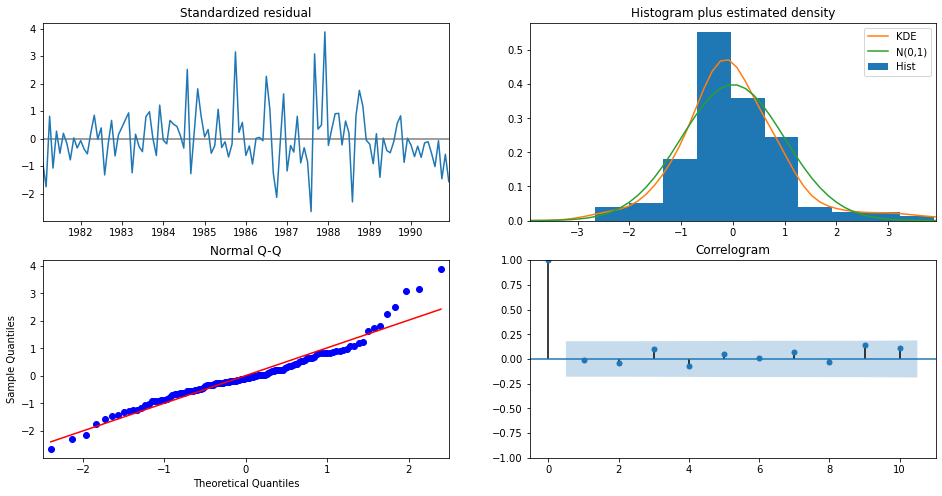

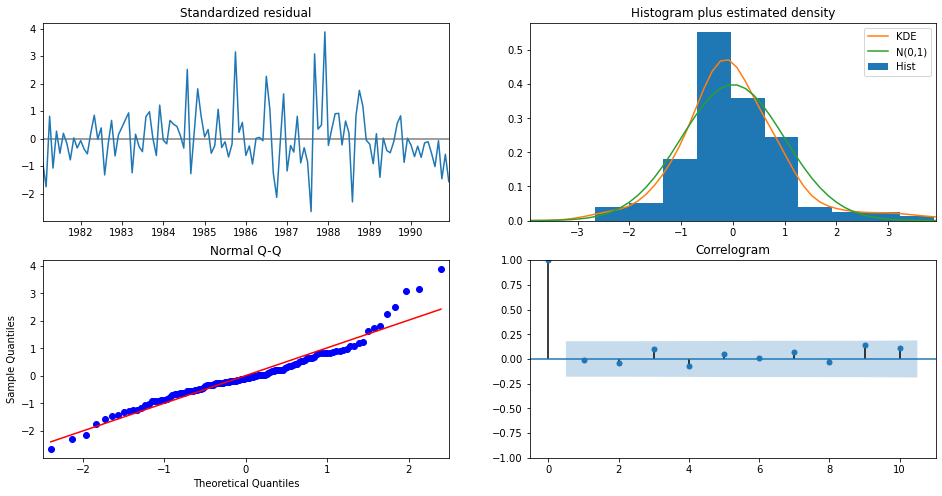

In [111]:
sarima_model.plot_diagnostics(figsize=(16,8))

In [112]:
test.shape

(55, 1)

In [113]:
pred_sarima = sarima_model.get_forecast(steps=55)

In [114]:
rmse_sarima = np.sqrt(mean_squared_error(test,pred_sarima.predicted_mean))
rmse_sarima

343.3116320860303

In [115]:
resultsDf.loc['SARIMA'] = rmse_sarima

In [116]:
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844
LR,1389.135175
NB,3864.279352
Simple Average,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


# 7) Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [260]:
# ACF and PACF plots

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


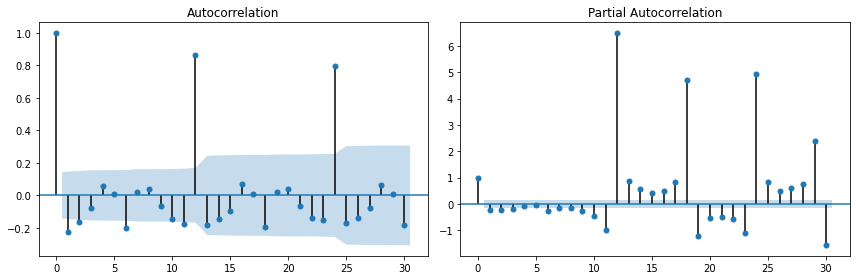

In [117]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(data_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(data_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [262]:
# From ACF and PACF plots above we can notive few points - 
# 1. Significant lag after which the ACF cuts-off is 3 that is p = 2
# 2. Significant lag after which the PACF cuts-off is 4 that is q = 4
# 3. Searsonal lag is 12

# ARIMA Model

In [173]:
manual_arima_model = ARIMA(train,order=(2,1,4)).fit()

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [174]:
manual_arima_model.aic

2220.2205054806113

In [175]:
print(manual_arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -1102.110
Method:                       css-mle   S.D. of innovations           1050.995
Date:                Sat, 07 Nov 2020   AIC                           2220.221
Time:                        20:13:46   BIC                           2243.222
Sample:                    02-01-1980   HQIC                          2229.567
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1440      3.925      1.565      0.117      -1.548      13.836
ar.L1.D.Sparkling    -1.5963      0.048    -33.499      0.000      -1.690      -1.503
ar.L2.D.Sparkling    -0.

In [176]:
pred_manual_arima = manual_arima_model.forecast(steps=55)

In [177]:
rmse_manual_arima = np.sqrt(mean_squared_error(test,pred_manual_arima[0]))
rmse_manual_arima

1399.0555785963588

In [178]:
resultsDf.loc['Manual ARIMA'] = rmse_manual_arima

In [179]:
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844
LR,1389.135175
NB,3864.279352
Simple Average,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


# SARIMA Model

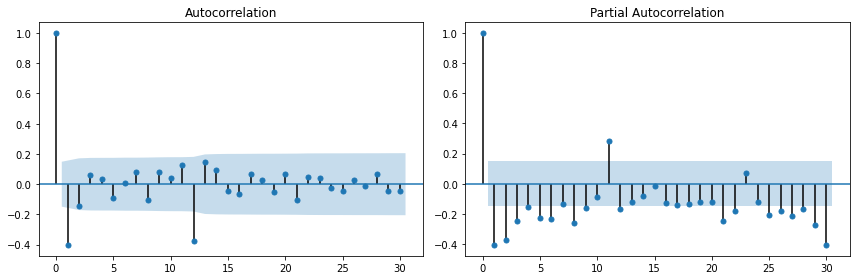

In [130]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf((df.diff(12).dropna()).diff(1).dropna(), lags=30, ax=axes[0])
smt.graphics.plot_pacf((df.diff(12).dropna()).diff(1).dropna(), lags=30, ax=axes[1])
plt.tight_layout()

In [271]:
# P = 3, D = 1, Q = 2

In [146]:
sarima_manual_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(6, 1, 1),
                                      seasonal_order=(3, 1, 2, 12),
                                      enforce_stationarity=True).fit()


/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [132]:
print(sarima_manual_model.summary().tables[0])
print(sarima_manual_model.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(6, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -881.123
Date:                            Fri, 06 Nov 2020   AIC                           1784.246
Time:                                    07:34:04   BIC                           1814.816
Sample:                                01-01-1980   HQIC                          1796.659
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1038      0.172      0.605      0.545      -0.233       0.440
ar.L2         -0.1224      0.128   

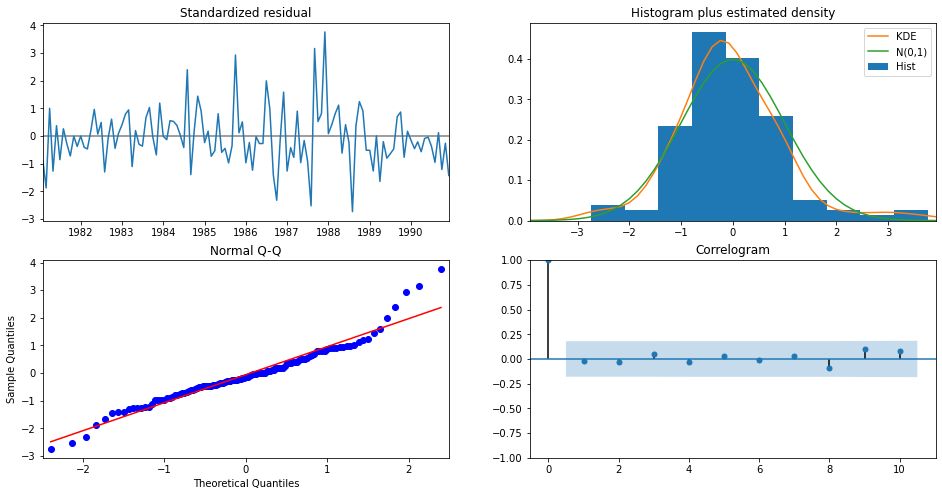

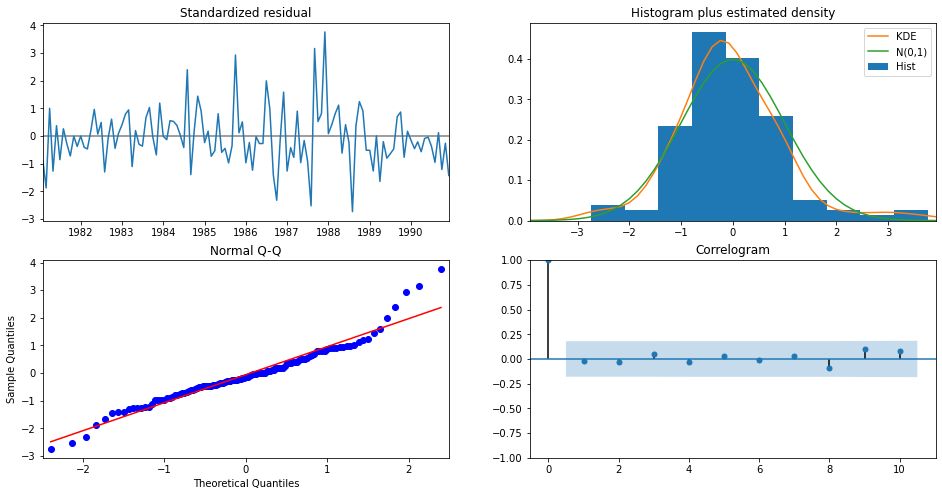

In [133]:
sarima_manual_model.plot_diagnostics(figsize=(16,8))

In [134]:
pred_manual_sarima = sarima_manual_model.get_forecast(steps=55)

In [135]:
rmse_manual_sarima = np.sqrt(mean_squared_error(test,pred_manual_sarima.predicted_mean))
rmse_manual_sarima

546.0119766985941

In [136]:
resultsDf.loc['Manual SARIMA'] = rmse_manual_sarima

# 8) Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [172]:
resultsDf

,Test RMSE
SES,1275.081797
DES,3851.089353
TES,360.347809
TES2,383.169844
LR,1389.135175
NB,3864.279352
Simple Average,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


# 9) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [279]:
# The lowest RMSE score is of Auto SARIMA

In [138]:
full_model = sm.tsa.statespace.SARIMAX(df,
                                      order=(6, 1, 1),
                                      seasonal_order=(2, 1, 1, 12),
                                      enforce_stationarity=True).fit()

/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/arpitgautam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [139]:
print(full_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(6, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -1281.642
Date:                            Fri, 06 Nov 2020   AIC                           2585.283
Time:                                    07:45:17   BIC                           2620.033
Sample:                                01-01-1980   HQIC                          2599.380
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0870      0.088      0.987      0.324      -0.086       0.260
ar.L2         -0.0764      0.092   

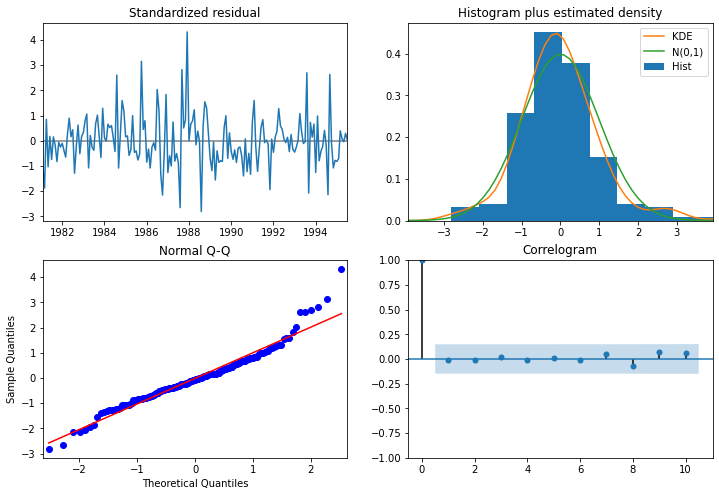

In [140]:
full_model.plot_diagnostics();

In [141]:
pred_full_model_sarima = full_model.get_forecast(steps=12)

In [180]:
rmse_auto_sarima = np.sqrt(mean_squared_error(df,full_model.fittedvalues))
rmse_auto_sarima

534.4678931903776

In [181]:
pred_full_auto_SARIMA_date = pred_full_model_sarima.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-01',end='1996-07-01', freq='M'))

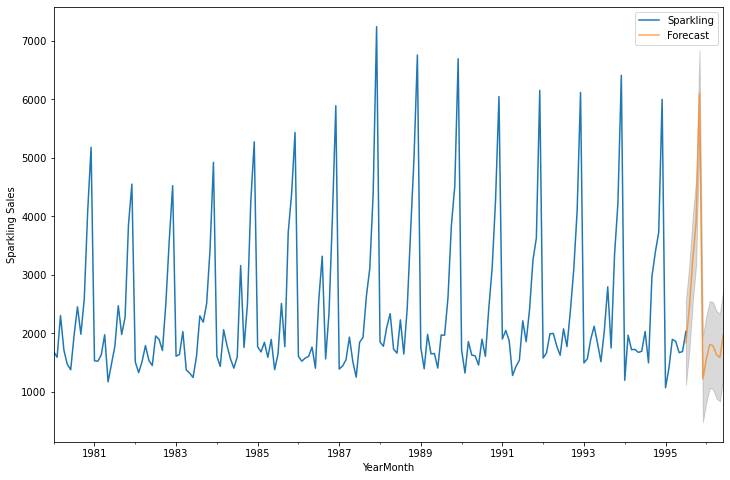

In [182]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()

# 10) Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [ ]:
Moving Average part is quite significant than the Auto Regressive part.  
The KDE plot of the residuals is almost similar with the normal distribution.  
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots)  follows the linear trend of the samples taken from a standard normal distribution with  N(0, 1). Again, this shows that the residuals are normally distributed.  
The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the  bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.  
From this we can conclude that the residuals are random with no information and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It seems that our SARIMA model is working fine. 
From business point of view we can see from the forecast plot above, the predicted sales of ‘Sparkling’ wine of future 12 months seem to be good, there is seasonal effect which can cause sales go to up as well.In order to boost more profit - 
We can offer discounts to the customers in the festive season.  
We can give free samples to the customers for tasting and in return hope for feedback  which in return helps us to gain information about what is wrong with this wine.  
Depending on the taste feedback we can add flavours.  
As we know different wines are for different occasions we can also provide the same  knowledge to the customers.  
Social media is a powerful tool to promote our product.  